In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

In [2]:
trim_list = []

for T in ['20162', '20163', '20164', '20171', '20172',  '20173',  '20174',  '20181', '20182', '20183']:
    Y = T[:-1]; Q = T[-1]

    # df = pd.read_csv('./DesTree_25rand.csv')
    df = pd.read_csv('./RFReg_.1BA'+T+'.csv').sample(frac = .1)
    df['ANO4'] = T[:-1]; df['TRIMESTRE'] = T[-1] # Pegado con boligomaa


    df = df
    df['P10'] = 3 - df['P10']

    trim_list += [df]
    
df = pd.concat(trim_list)

In [3]:
# Fix people's age column
P03 = pd.read_csv('./sample_censo_table_f.1BA.csv', usecols = ['PERSONA_REF_ID', 'P03'])
df = df.drop('P03', axis = 1).merge(P03)

In [4]:
df_emp = df[['PERSONA_REF_ID','DPTO', 'P03','ANO4', 'TRIMESTRE','CONDACT', 'CAT_OCUP', 'CAT_INAC', 'P47T','V3_M','T_VI','V12_M','TOT_P12','V5_M','V2_M','PP08D1','P21']]
# sum_e = pd.get_dummies(df_emp, columns = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']).groupby(['DPTO','ANO4','TRIMESTRE']).sum()
# total_e = df_emp.groupby(['DPTO','ANO4','TRIMESTRE']).count().iloc[:, 1]
# perce = 100*np.round(sum_e.div(total_e, 0), 4)

In [5]:
df_25_50_emp = df_emp.loc[df.P03.isin(range(25, 50))]
df_jub_emp = df_emp.loc[df.P03 > 50]

## Explorar data

In [ ]:
df.loc[(df.P03.isin(range(25, 50)))&(df.CAT_OCUP == 3)].groupby(['DPTO', 'ANO4'])[['P47T','V3_M','T_VI','V12_M','TOT_P12','V5_M','V2_M','PP08D1','P21']].describe()

## Departamentos

In [6]:
pd.set_option('display.max_colwidth', -1)

# DPTOs = df_emp.DPTO.unique()
DPTOs = df_emp.groupby(['DPTO']).count()['PERSONA_REF_ID'].sort_values().tail(25).index


DPTO_ref = pd.read_csv('./DPTO.csv', ';', index_col='DPTO')
DPTO_ref[['NOMDPTO']].loc[DPTOs]

,NOMDPTO
DPTO,
2013,Comuna 13
6861,Vicente López
6760,San Miguel
6412,José C. Paz
6756,San Isidro
6638,Pilar
6260,Esteban Echeverría
6056,Bahía Blanca
6568,Morón


## Plot income distribution. 
#### 2016-17-18. Q2, Q3. estimado con 1M personas de censo 2010 en 25 partidos de PBA y comunas CABA.

In [16]:
import warnings
warnings.filterwarnings('ignore')

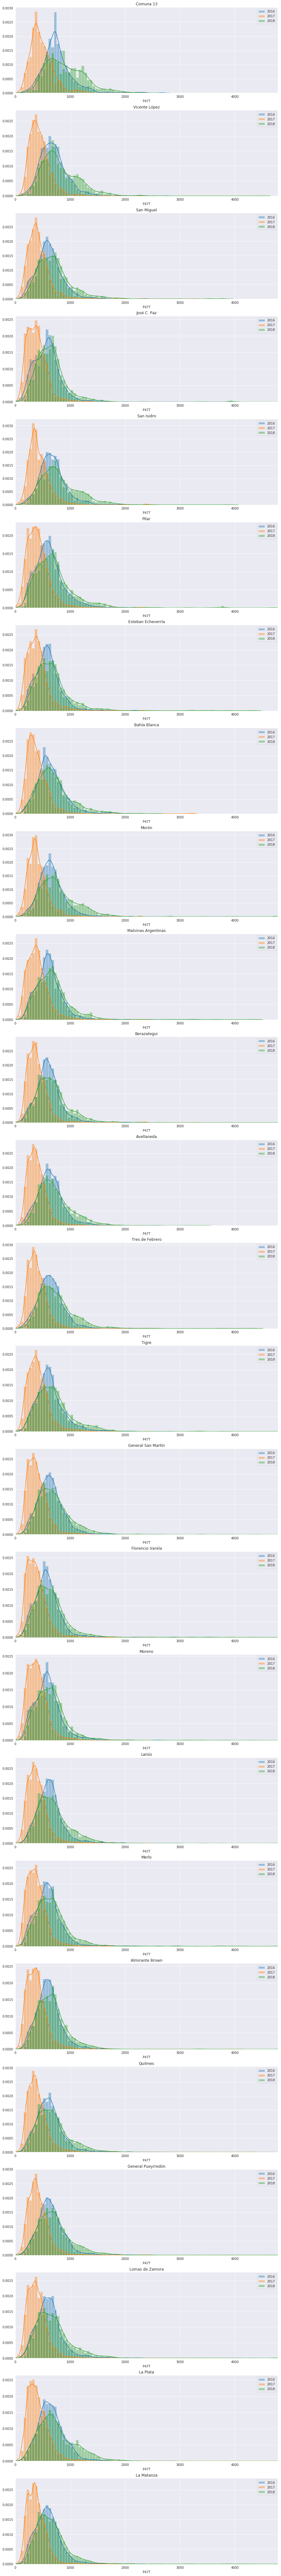

In [8]:
USD = pd.read_csv('./USD_ARS.csv')
import matplotlib.pyplot as plt
%matplotlib inline

quarter = df[['ANO4', 'TRIMESTRE']].drop_duplicates()
q_int = quarter.astype(int)
# dptos = df_25_50_emp.DPTO.unique()
dptos = DPTOs

import seaborn as sns

sns.set_style('darkgrid')
# sns.distplot(d)

fig, axs = plt.subplots(len(dptos), 1, figsize = (15, 6*len(dptos)))

i = 0
for d in dptos:
    df_25_50_dpto = df_25_50_emp.loc[df_25_50_emp.DPTO == d]
    j = 0
    for q in quarter.values:
        if q[1] == '2':
            USD_price = USD.groupby(['ANO4', 'TRIMESTRE'])[['Price']].mean().loc[(int(q[0]), int(q[1]))].Price
            USD_price_1 = USD.groupby(['ANO4', 'TRIMESTRE'])[['Price']].mean().loc[(int(q[0]), int(q[1])+1)].Price
            USD_price = (USD_price_1 + USD_price)/2.
            
        #     print(i, j)
            df = df_25_50_dpto
            seleccion = df.loc[(df.CAT_OCUP == 3) & (df.ANO4 == q[0]) & (df.TRIMESTRE.isin([q[1], str(int(q[1]) + 1)]))]

            sns.distplot(seleccion['P47T']/USD_price, range(0, 5000, 50), ax = axs[i], hist_kws={'density': True})
            axs[i].set_xlim(0, 80000/USD_price)
#             axs[i].hist(seleccion['P47T'], range(0, 50000, 500), cumulative = True, alpha = .2)
            j += 1

    axs[i].set_title(DPTO_ref[['NOMDPTO']].loc[d].values[0].strip())
    axs[i].legend(labels = ('2016', '2017', '2018'))

    i += 1



In [ ]:
USD = pd.read_csv('./USD_ARS.csv')
import matplotlib.pyplot as plt
%matplotlib inline

quarter = df_jub_emp[['ANO4', 'TRIMESTRE']].drop_duplicates()
q_int = quarter.astype(int)
dptos = df_jub_emp.DPTO.unique()

import seaborn as sns

sns.set_style('darkgrid')
# sns.distplot(d)

fig, axs = plt.subplots(len(dptos), 1, figsize = (15, 6*len(dptos)))

i = 0
for d in dptos:
    df_jub_emp_dpto = df_jub_emp.loc[df_jub_emp.DPTO == d]
    j = 0
    for q in quarter.values:
        if q[1] == '2':
            USD_price = USD.groupby(['ANO4', 'TRIMESTRE'])[['Price']].mean().loc[(int(q[0]), int(q[1]))].Price
            USD_price_1 = USD.groupby(['ANO4', 'TRIMESTRE'])[['Price']].mean().loc[(int(q[0]), int(q[1])+1)].Price
            USD_price = (USD_price_1 + USD_price)/2.
            
        #     print(i, j)
            df = df_jub_emp_dpto
            seleccion = df.loc[(df.CAT_INAC == 1) & (df.ANO4 == q[0]) & (df.TRIMESTRE.isin([q[1], str(int(q[1]) + 1)]))]

            sns.distplot(seleccion['P47T']/USD_price, range(0, 1500, 50), ax = axs[i], hist_kws={'density': True})
            axs[i].set_xlim(0, 80000/USD_price)
#             axs[i].hist(seleccion['P47T'], range(0, 50000, 500), cumulative = True, alpha = .2)
            j += 1

    axs[i].set_title(DPTO_ref[['NOMDPTO']].loc[d].values[0].strip())
    axs[i].legend(labels = ('2016', '2017', '2018'))

    i += 1



KeyboardInterrupt: 

### Older code

In [153]:
# df_25_50.groupby('DPTO').mean()

# Empleo 1
#     df_13_24_part_empl = df_13_24_part[['PERSONA_REF_ID','DPTO','P03','PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']]
df_25_50_emp = df_25_50[['PERSONA_REF_ID','DPTO','P03','CONDACT', 'CAT_OCUP', 'CAT_INAC']]
sum_e = pd.get_dummies(df_25_50_emp, columns = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']).groupby('DPTO').sum()
total_e = df_25_50_emp.groupby('DPTO').count().iloc[:, 1]
perce = 100*np.round(sum_e.div(total_e, 0), 4)

# Empleo 2
df_25_50_emp2 = df_25_50[['PERSONA_REF_ID','DPTO','P03','PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']]
sum_e2 = pd.get_dummies(df_25_50_emp2, columns = ['PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']).groupby('DPTO').sum()
total_e2 = df_25_50_emp2.groupby('DPTO').count().iloc[:, 1]
perce2 = 100*np.round(sum_e2.div(total_e2, 0), 4)
# perce3 = pd.concat([perce[[col for col in perce.columns if 'CAT_OCUP' in col][1:3]], perce2[[col for col in perce2.columns if 'PP07K' in col][1:]]], axis = 1) # Anadir cuenta propistas. No cuentan para pregunta cobro sin recibo


In [60]:
perce

,PERSONA_REF_ID,P03,CONDACT_0,CONDACT_100,CONDACT_200,CONDACT_300,CAT_OCUP_0.0,CAT_OCUP_1.0,CAT_OCUP_2.0,CAT_OCUP_3.0,CAT_INAC_0.0,CAT_INAC_1.0,CAT_INAC_3.0,CAT_INAC_4.0,CAT_INAC_6.0,CAT_INAC_7.0
DPTO,,,,,,,,,,,,,,,,
2014,2.592348e+08,3558.56,1.99,88.97,2.42,6.62,6.63,0.15,1.28,91.94,93.43,1.16,1.56,3.83,0.01,0.00
6091,3.923904e+08,3603.79,0.27,78.82,5.12,15.78,15.80,0.06,2.51,81.64,84.28,5.84,1.31,8.45,0.05,0.06


In [113]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_height()
        diff = current_width - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [114]:
pd.set_option('display.max_colwidth', -1)
DPTOs = df_13_24.DPTO.unique()
DPTO_ref = pd.read_csv('./DPTO.csv', ';', index_col='DPTO')
DPTO_ref[['NOMDPTO']].loc[DPTOs]

,NOMDPTO
DPTO,
2014,Comuna 14
6091,Berazategui
6260,Esteban Echeverría
2001,Comuna 01
2005,Comuna 05
6408,Hurlingham
6427,La Matanza


In [195]:
# from pylab import *

# cmap = cm.get_cmap('Paired', 12)    # PiYG

# for i in range(cmap.N):
#     rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
#     print(matplotlib.colors.rgb2hex(rgb)) # Azul V Rojo Violeta Marron

colors = ['#d3d3d3','#d3d3d3','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928', '#d3d3d3','#d3d3d3','#636363']
colors2 = ['#d9d9d900','#d9d9d900','#d9d9d900', '#d9d9d9B3', '#bdbdbdB3', '#969696B3', '#636363B3', '#252525B3']

NOMDPTO    Comuna 14                                         
Name: 2014, dtype: object

No handles with labels found to put in legend.


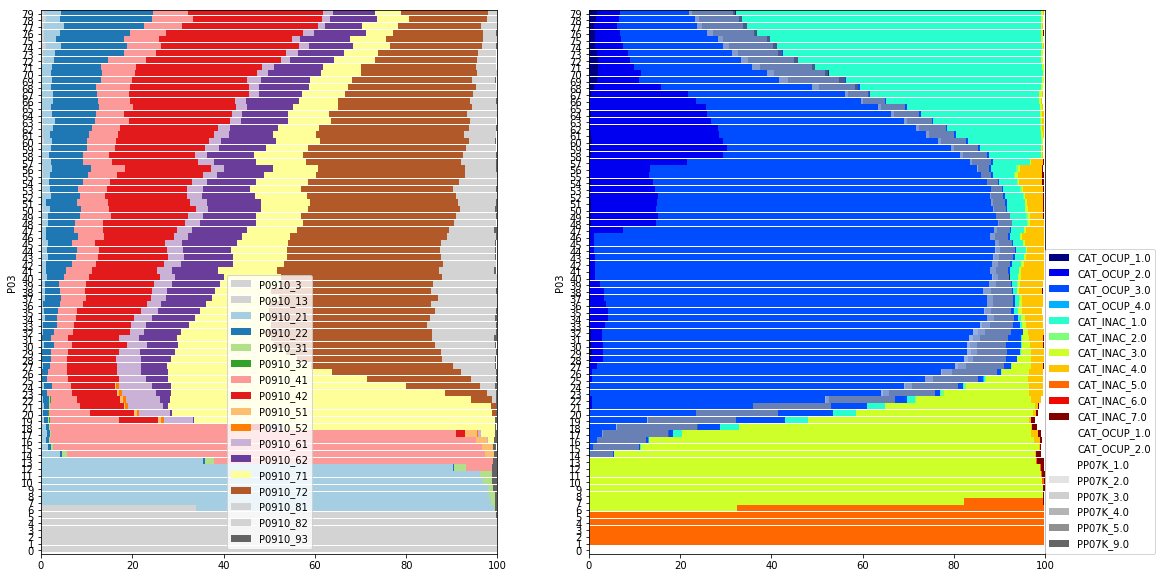

NOMDPTO    Berazategui                                       
Name: 6091, dtype: object

No handles with labels found to put in legend.


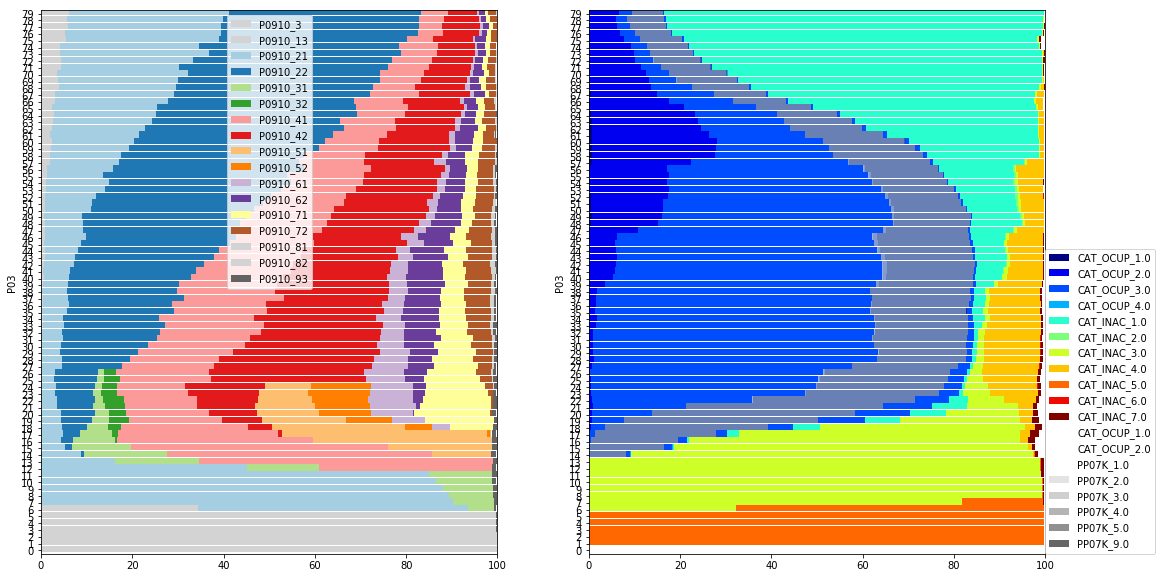

NOMDPTO    Esteban Echeverría                                
Name: 6260, dtype: object

No handles with labels found to put in legend.


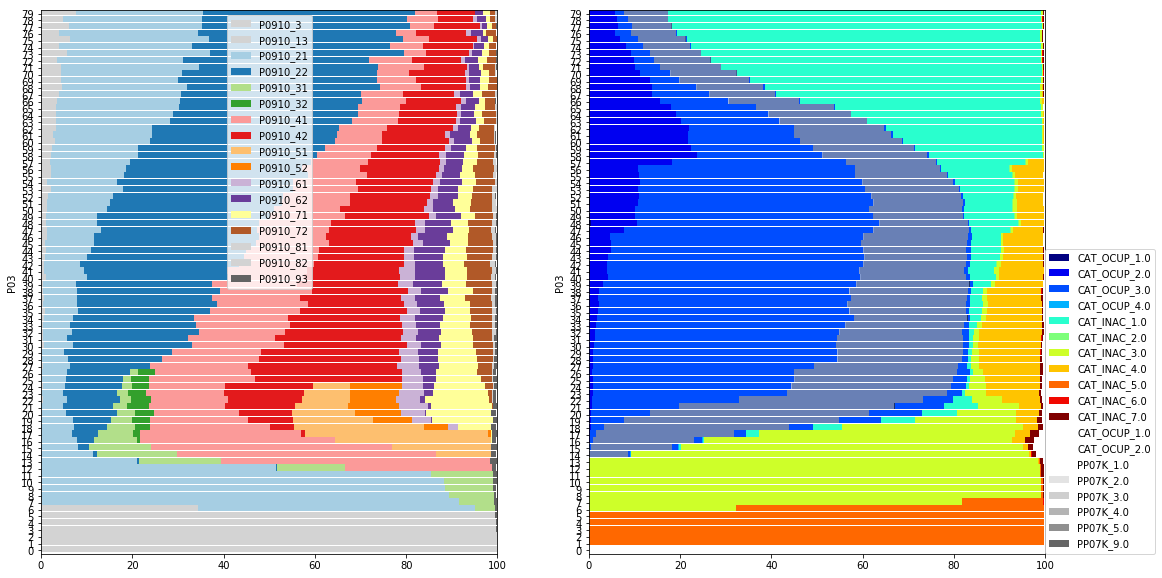

NOMDPTO    Comuna 01                                         
Name: 2001, dtype: object

No handles with labels found to put in legend.


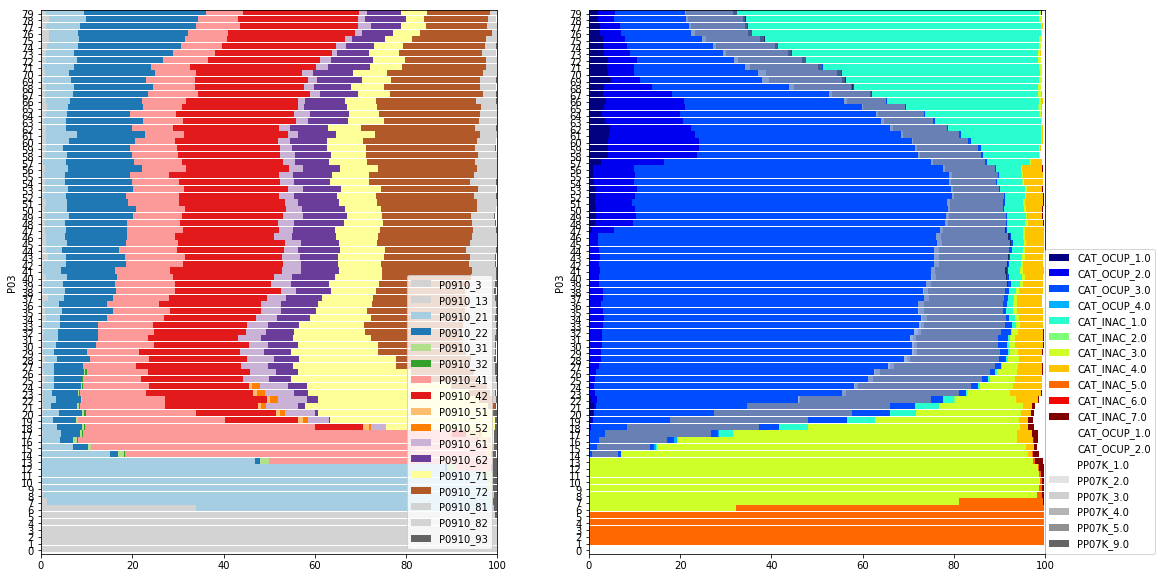

NOMDPTO    Comuna 05                                         
Name: 2005, dtype: object

No handles with labels found to put in legend.


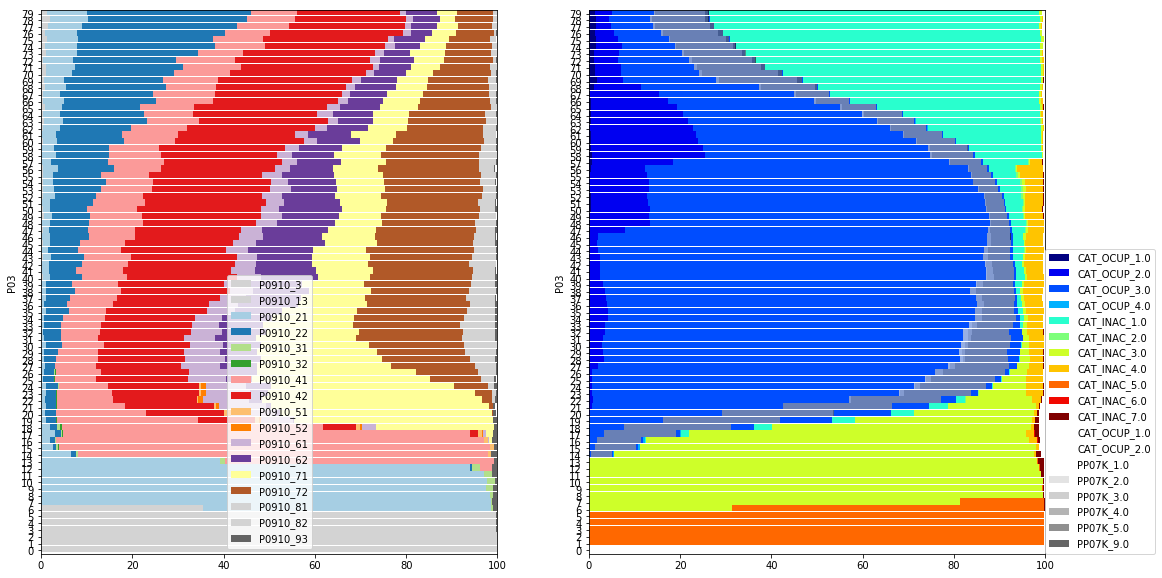

NOMDPTO    Hurlingham                                        
Name: 6408, dtype: object

No handles with labels found to put in legend.


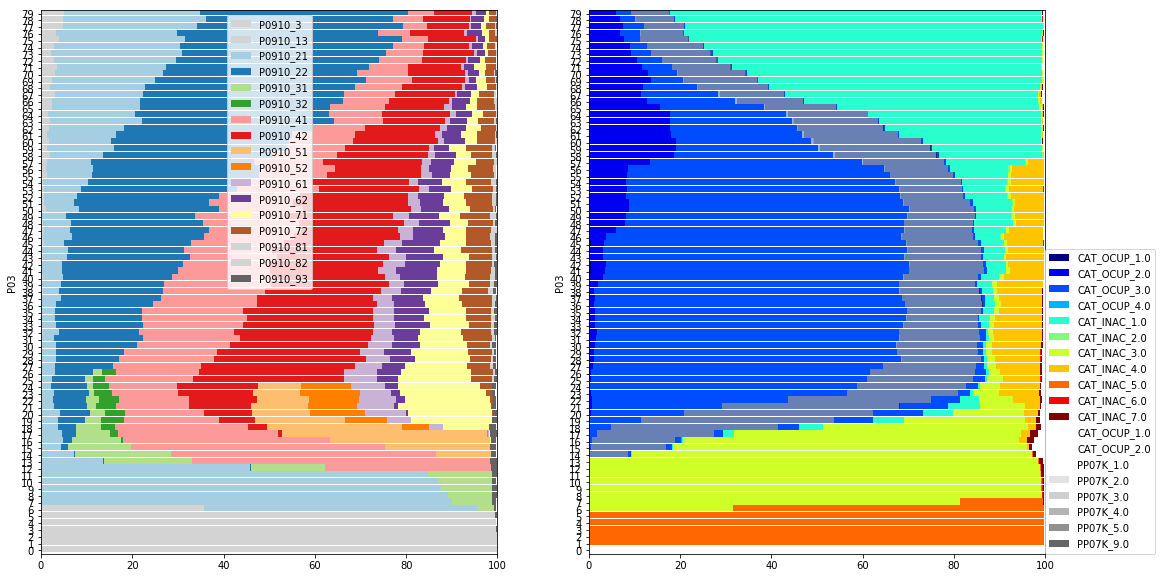

NOMDPTO    La Matanza                                        
Name: 6427, dtype: object

No handles with labels found to put in legend.


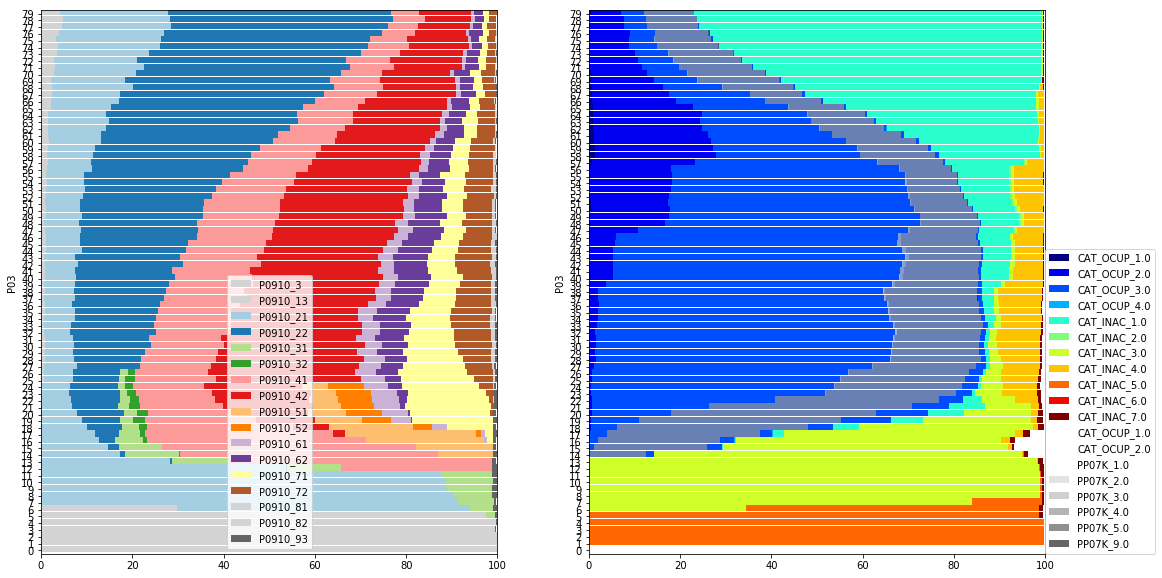

In [203]:
# colors2 = ['#d9d9d900', '#d9d9d9', '#bdbdbd', '#969696', '#636363', '#252525']

import warnings
warnings.filterwarnings('ignore')

for partido in DPTOs:
    display(DPTO_ref[['NOMDPTO']].loc[partido])
    df_13_24_part = df_13_24.loc[df_13_24.DPTO == partido]
    
    # Educacion
    df_13_24_part['P0910'] = (df_13_24_part['P09'].astype(str) + df_13_24_part['P10'].astype(str)).astype(int)
    df_13_24_part_educ = df_13_24_part[['PERSONA_REF_ID','DPTO','P03','P07','P08', 'P0910']]
    sum_ = pd.get_dummies(df_13_24_part_educ, columns = ['P07', 'P08','P0910']).groupby('P03').sum()
    total_ = df_13_24_part_educ.groupby('P03').count().iloc[:, 1]
    perc = 100*np.round(sum_.div(total_, 0), 3)
    
    # Empleo 1
#     df_13_24_part_empl = df_13_24_part[['PERSONA_REF_ID','DPTO','P03','PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']]
    df_13_24_part_empl = df_13_24_part[['PERSONA_REF_ID','DPTO','P03','CONDACT', 'CAT_OCUP', 'CAT_INAC']]
    sum_e = pd.get_dummies(df_13_24_part_empl, columns = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']).groupby('P03').sum()
    total_e = df_13_24_part_empl.groupby('P03').count().iloc[:, 1]
    perce = 100*np.round(sum_e.div(total_e, 0), 3)
    
    # Empleo 2
    df_13_24_part_empl2 = df_13_24_part[['PERSONA_REF_ID','DPTO','P03','PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']]
    sum_e2 = pd.get_dummies(df_13_24_part_empl2, columns = ['PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']).groupby('P03').sum()
    total_e2 = df_13_24_part_empl2.groupby('P03').count().iloc[:, 1]
    perce2 = 100*np.round(sum_e2.div(total_e2, 0), 3)
    perce3 = pd.concat([perce[[col for col in perce.columns if 'CAT_OCUP' in col][1:3]], perce2[[col for col in perce2.columns if 'PP07K' in col][1:]]], axis = 1) # Anadir cuenta propistas. No cuentan para pregunta cobro sin recibo

    
    fig, axs = plt.subplots(1, 2, figsize = (18, 10))

    perc[[col for col in perc.columns if 'P0910' in col]].plot(kind='barh', stacked=True, ax = axs[0], color = colors)
    change_width(axs[0], .9)
    axs[0].set_xlim(0, 100)
    plt.legend(loc = (1,0))
    
    perce.rolling(2, win_type='triang').mean()[[col for col in perce.columns if 'CAT_OCUP' in col][1:] + [col for col in perce.columns if 'CAT_INAC' in col][1:]].plot(
        kind='barh', stacked=True, ax = axs[1], cmap="jet")
    change_width(axs[1], .9)    
    axs[1].set_xlim(0, 100)
    plt.legend(loc = (1,0))
    
    ax = axs[1]
#     (perce2[[col for col in perce2.columns if 'PP07K' in col][1:]]).plot(
#         kind='barh', stacked=True, ax = ax, color = colors2)
    perce3.rolling(2, win_type='triang').mean().plot(kind='barh', stacked=True, ax = ax, color = colors2)
    change_width(ax, .9)   
    ax.set_xlim(0, 100)
    plt.legend(loc = (1,0))



    plt.show()
    
# Decifrar la leyenda usando https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf

In [200]:
perce3.rolling(1, win_type='triang').mean()

,CAT_OCUP_1.0,CAT_OCUP_2.0,PP07K_1.0,PP07K_2.0,PP07K_3.0,PP07K_4.0,PP07K_5.0,PP07K_9.0
P03,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
